# Sentiment Classifier for Rotten Tomatoes Movie Reviews

## II. Exploratory Data Analysis

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('dark_background')
plt.style.use(style="seaborn")
%matplotlib inline

# Import custom preprocessing functions
import sys
sys.path.insert(0, 'modules/')
from data_preprocessing import *

# NLP
from nltk.tokenize import word_tokenize
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

We can load the cleaned data from the previous section.

In [2]:
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/final-project/data/rotten_tomatoes/reviews_clean.csv', encoding='utf-8')
df = pd.read_csv('../data/rotten_tomatoes/rotten_tomatoes_critic_reviews.csv', encoding='utf-8')
reviews = pd.read_csv('../data/rotten_tomatoes/reviews_clean.csv', encoding='utf-8')

Let's make sure that the `Text` column values are of type *str* 

In [3]:
reviews['Text'] = reviews['Text'].astype('str')

In [44]:
reviews

,Text,Type
0,fantasy adventure fuse greek mythology contemp...,1
1,uma thurman medusa gorgon coiffure writhing sn...,1
2,topnotch cast dazzling special effect tide tee...,1
3,whether audience get behind lightning thief ha...,1
4,really lacking lightning thief genuine sense w...,0
...,...,...
949176,rousing reconstruction 1879 battle rorkes drift,1
949177,seen today startling indictment british imperi...,1
949178,rousing visual spectacle prequel cy endfield d...,1
949179,simple twoact story prelude war war former con...,0


Because the dataset is quite large (~950,000 rows), we will take a random sample of 300,000 for analysis.

In [5]:
reviews_300k = reviews.sample(300000, random_state = 777)

In [6]:
reviews_300k.head()

,Text,Type
37155,real meat potato proposition satisfying tasty,1
501962,young old jock nerd geek freak everyone able f...,1
144431,strong performance thornton kinnear barely com...,1
795218,entertaining romp succeeds level pure escapism,1
660748,borgesian critique exotic backdrop scoundrel h...,1


Let's save this into a CSV file:

In [9]:
reviews_300k.to_csv("../data/rotten_tomatoes/reviews_300k.csv", index=False)

We can visualize the composition of Fresh (1) vs Rotten (0) ratings through the plot below:

<AxesSubplot:xlabel='Type', ylabel='count'>

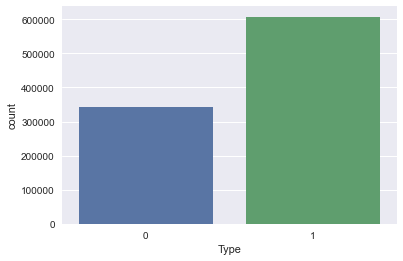

In [10]:
sns.countplot(x='Type', data=reviews)

And for the 300k dataset, we could also find a similar composition.

<AxesSubplot:xlabel='Type', ylabel='count'>

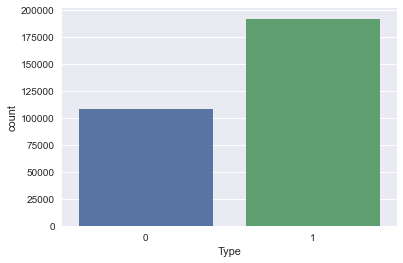

In [11]:
sns.countplot(x='Type', data=reviews_300k)

A plot of the distribution of review lengths would help us determine a max length of words per review for our analysis.

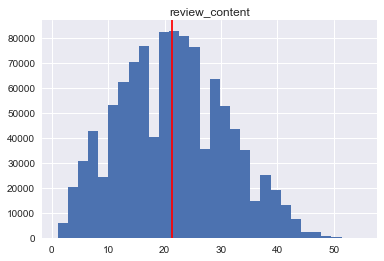

In [16]:
df_review_word_count = []

# Populate the list with the lengths of the sentences
for review in df.dropna(subset = ['review_content'])['review_content'].values:
      df_review_word_count.append(len(review.split()))

length_df = pd.DataFrame({'review_content':df_review_word_count})

length_df.hist(bins = 30)
plt.axvline(length_df['review_content'].mean(), c='red', label='Mean')
plt.show()

However, let's take a look at the lengths for the cleaned reviews.

Distribution of Review Length for Full Dataset:

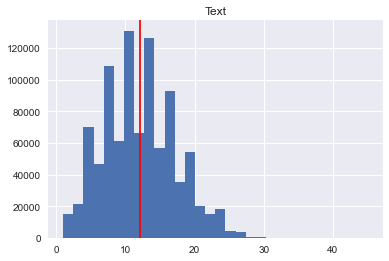

In [13]:
clean_review_word_count = []

# populate the lists with sentence lengths
for review in reviews['Text'].values:
      clean_review_word_count.append(len(review.split()))

clean_length_df = pd.DataFrame({'Text':clean_review_word_count})

clean_length_df.hist(bins = 30)
plt.axvline(clean_length_df['Text'].mean(), c='red', label='Mean')

plt.show()

Distribution of Review Length for 300k Dataset

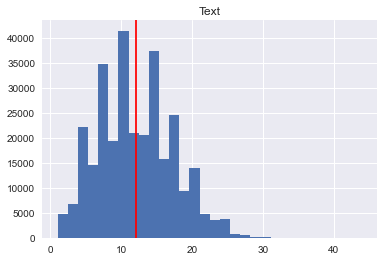

In [17]:
clean_review_300k_word_count = []

# populate the lists with sentence lengths
for review in reviews_300k['Text'].values:
      clean_review_300k_word_count.append(len(review.split()))

clean_300k_length_df = pd.DataFrame({'Text':clean_review_300k_word_count})

clean_300k_length_df.hist(bins = 30)
plt.axvline(clean_300k_length_df['Text'].mean(), c='red', label='Mean')

plt.show()

It seems like 30 could be a good number for max length of words per review for our analysis. But based on my observation for years of reading reviews in Rotten Tomatoes, reviews could take longer, so let's set it a little bit higher to 50.

In [22]:
reviews_fresh = reviews_300k[reviews_300k['Type'] == 1]
reviews_rotten = reviews_300k[reviews_300k['Type'] == 0]


In [26]:
reviews_fresh.head()

,Text,Type
37155,real meat potato proposition satisfying tasty,1
501962,young old jock nerd geek freak everyone able f...,1
144431,strong performance thornton kinnear barely com...,1
795218,entertaining romp succeeds level pure escapism,1
660748,borgesian critique exotic backdrop scoundrel h...,1


In [13]:
reviews_rotten.head()

,Text,Type
4,really lacking lightning thief genuine sense w...,0
5,list ingredient moviemagic potion enjoy start ...,0
6,harry potter knockoff come transparent slapdas...,0
11,intended bad movie indifferent one,0
12,chris columbus return comfort zone mirthless e...,0


In [27]:
reviews_fresh_str = reviews_fresh['Text'].str.cat(sep=' ')
reviews_rotten_str = reviews_rotten['Text'].str.cat(sep=' ')

In [75]:
X_fresh_reviews = vectorizer_fresh.fit_transform(reviews_300k['Text'])

In [103]:
#reviews_fresh_str_list = reviews_fresh_str.split()
vectorizer_fresh = TfidfVectorizer(max_df=0.9, min_df=1000, stop_words=stop_words)
#X_fresh = vectorizer_fresh.fit_transform(reviews_fresh_str_list)
X_fresh_reviews = vectorizer_fresh.fit_transform(list(reviews_fresh['Text'].values))

In [108]:
vectorizer_fresh.vocabulary_

{'real': 239,
 'satisfying': 251,
 'young': 344,
 'old': 207,
 'everyone': 90,
 'find': 112,
 'something': 277,
 'love': 174,
 'strong': 289,
 'performance': 215,
 'acting': 1,
 'entertaining': 83,
 'level': 165,
 'hollywood': 139,
 'movie': 194,
 'sort': 279,
 'effect': 72,
 'cast': 38,
 'make': 176,
 'sure': 294,
 'film': 108,
 'heart': 132,
 'right': 247,
 'place': 220,
 'clever': 47,
 'thriller': 310,
 'go': 127,
 'point': 225,
 'full': 119,
 'review': 244,
 'spanish': 281,
 'great': 130,
 'surprise': 295,
 'final': 111,
 'summer': 293,
 'delivers': 59,
 'mind': 189,
 'laugh': 159,
 'like': 168,
 'probably': 231,
 'feel': 106,
 'watch': 329,
 'fine': 113,
 'powerful': 229,
 'piece': 219,
 'documentary': 67,
 'filmmaking': 110,
 'little': 170,
 'audience': 21,
 'show': 268,
 'political': 226,
 'help': 133,
 'war': 328,
 'fascinating': 104,
 'world': 339,
 'charm': 41,
 'time': 311,
 'one': 208,
 'long': 171,
 'de': 56,
 'take': 298,
 'think': 307,
 'would': 341,
 'really': 240,
 'si

In [114]:
fresh_blah = sorted(vectorizer_fresh.vocabulary_.items(), key=lambda x:x[1])
sortdict = dict(fresh_blah)
print(sortdict)

{'act': 0, 'acting': 1, 'action': 2, 'actor': 3, 'actually': 4, 'adaptation': 5, 'adult': 6, 'adventure': 7, 'age': 8, 'almost': 9, 'along': 10, 'also': 11, 'although': 12, 'always': 13, 'american': 14, 'animated': 15, 'another': 16, 'anyone': 17, 'anything': 18, 'around': 19, 'art': 20, 'audience': 21, 'away': 22, 'back': 23, 'bad': 24, 'beautiful': 25, 'beautifully': 26, 'beauty': 27, 'become': 28, 'best': 29, 'better': 30, 'big': 31, 'bit': 32, 'black': 33, 'book': 34, 'brilliant': 35, 'brings': 36, 'capture': 37, 'cast': 38, 'certainly': 39, 'character': 40, 'charm': 41, 'charming': 42, 'child': 43, 'cinema': 44, 'cinematic': 45, 'classic': 46, 'clever': 47, 'come': 48, 'comedy': 49, 'comic': 50, 'compelling': 51, 'complex': 52, 'could': 53, 'dark': 54, 'day': 55, 'de': 56, 'debut': 57, 'deeply': 58, 'delivers': 59, 'despite': 60, 'detail': 61, 'dialogue': 62, 'different': 63, 'directed': 64, 'direction': 65, 'director': 66, 'documentary': 67, 'done': 68, 'drama': 69, 'easily': 70,

In [109]:
#reviews_rotten_str_list = reviews_rotten_str.split()
vectorizer_rotten = TfidfVectorizer(max_df=0.9, min_df=1000, stop_words=stop_words)
#X_rotten = vectorizer_rotten.fit_transform(reviews_rotten_str_list)
X_rotten_reviews = vectorizer_rotten.fit_transform(list(reviews_rotten['Text'].values))

In [110]:
vectorizer_rotten.get_feature_names_out()

array(['action', 'actor', 'almost', 'also', 'another', 'anything',
       'around', 'attempt', 'audience', 'back', 'bad', 'best', 'better',
       'big', 'bit', 'cast', 'character', 'come', 'comedy', 'could',
       'day', 'despite', 'dialogue', 'director', 'drama', 'dull',
       'effect', 'effort', 'end', 'enough', 'even', 'ever', 'every',
       'everything', 'fails', 'fall', 'fan', 'far', 'feature', 'feel',
       'film', 'filmmaker', 'find', 'first', 'full', 'fun', 'funny',
       'genre', 'get', 'give', 'go', 'going', 'good', 'great', 'hard',
       'hollywood', 'horror', 'hour', 'humor', 'idea', 'instead',
       'interesting', 'joke', 'keep', 'kid', 'kind', 'know', 'lack',
       'last', 'laugh', 'le', 'least', 'life', 'like', 'little', 'long',
       'look', 'lot', 'love', 'made', 'make', 'making', 'man', 'many',
       'material', 'may', 'might', 'minute', 'moment', 'movie', 'much',
       'narrative', 'need', 'never', 'new', 'nothing', 'often', 'old',
       'one', 'original

In [106]:
reviews_fresh_vectorized = vectorizer_fresh.vocabulary_
wordcloud_fresh_tfidf = WordCloud(background_color="white", max_words=1000).generate_from_frequencies(reviews_fresh_vectorized)

Text(0.5, 1.0, 'Reviews with Fresh Ratings')

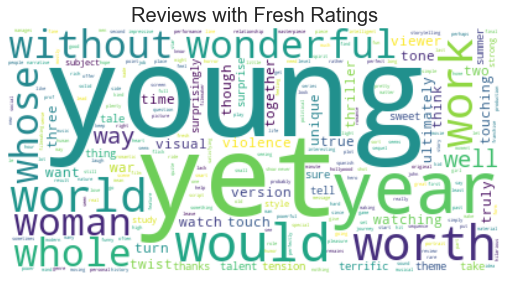

In [107]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_fresh_tfidf, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Fresh Ratings', fontsize=20)

In [113]:
reviews_rotten_vectorized = vectorizer_rotten.vocabulary_
wordcloud_rotten_tfidf = WordCloud(background_color="white", max_words=100).generate_from_frequencies(reviews_rotten_vectorized)

Text(0.5, 1.0, 'Reviews with Rotten Ratings')

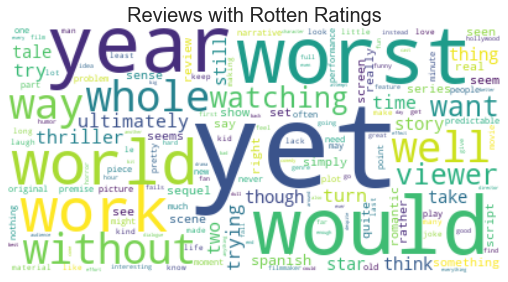

In [112]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_rotten_tfidf, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Reviews with Rotten Ratings', fontsize=20)

In [28]:
wordcloud_fresh = WordCloud(background_color='white').generate(reviews_fresh_str)
wordcloud_rotten = WordCloud(background_color='white').generate(reviews_rotten_str)

Text(0.5, 1.0, 'Reviews with Fresh Ratings')

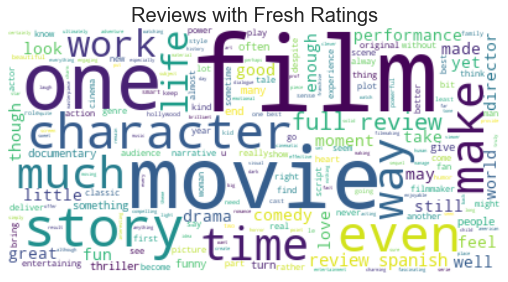

In [29]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_fresh, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Fresh Ratings', fontsize=20)

Text(0.5, 1.0, 'Reviews with Rotten Ratings')

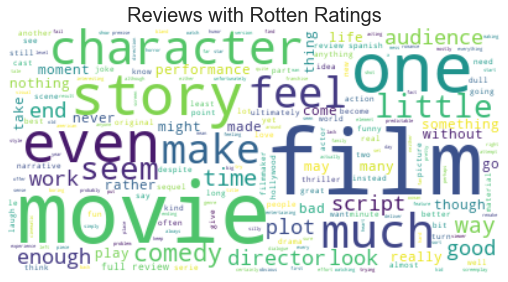

In [30]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_rotten, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Reviews with Rotten Ratings', fontsize=20)

Let’s visualize the words in "Fresh" reviews (1) with the help of a word cloud.

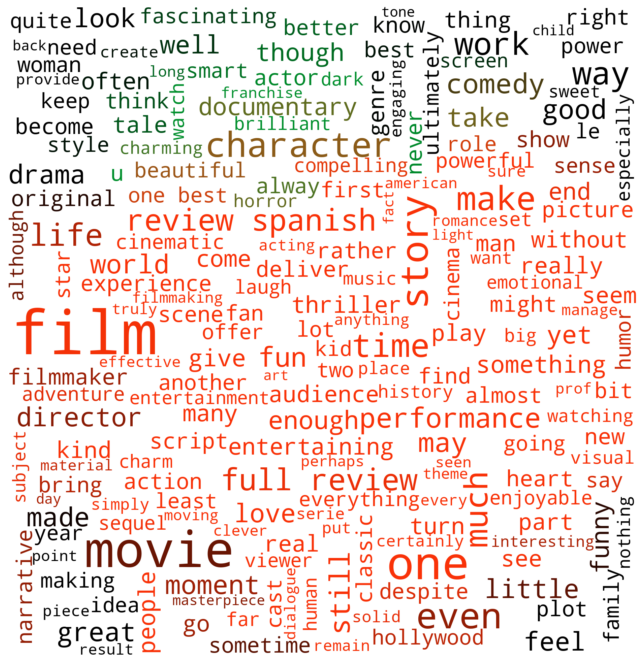

In [32]:
# Generate a word cloud image
mask = np.array(Image.open('../output/img/red_tomato_mask_colored.png'))
#wordcloud_tomato = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(str(review) for review in reviews[reviews['Type']==1]['Text']))
wordcloud_tomato_fresh = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=200, mask=mask).generate(reviews_fresh_str)

# Create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_tomato_fresh.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("../output/img/fresh_tomato_wordcloud.png", format="png")

plt.show()

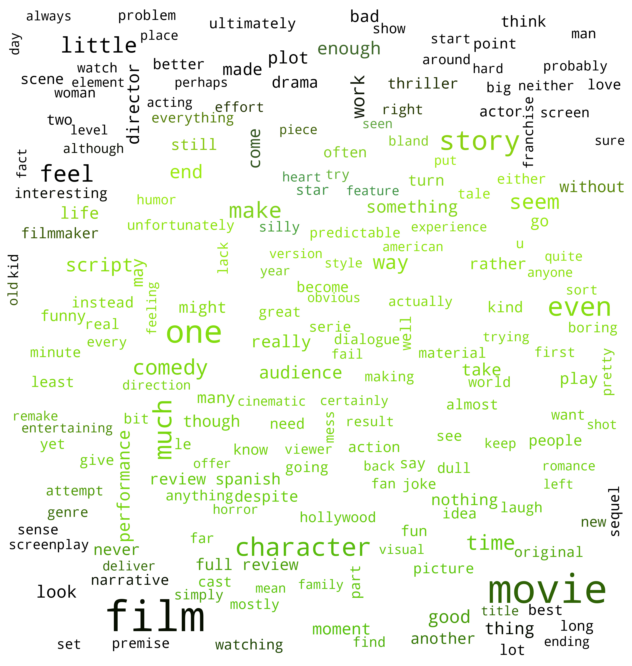

In [33]:
# Generate a word cloud image
mask_rotten = np.array(Image.open('../output/img/green_tomato_mask_colored.png'))
#wordcloud_tomato = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(str(review) for review in reviews[reviews['Type']==1]['Text']))
wordcloud_tomato_rotten = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=200, mask=mask_rotten).generate(reviews_rotten_str)

# Create coloring from image
image_colors = ImageColorGenerator(mask_rotten)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_tomato_rotten.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("../output/img/rotten_tomato_wordcloud.png", format="png")

plt.show()

In [4]:
tomato_mask = np.array(Image.open('../output/img/tomato_mask_bw.png'))

FileNotFoundError: [Errno 2] No such file or directory: '../output/img/tomato_mask.png'

In [49]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [50]:
# Transform your mask into a new one that will work with the function:
transformed_tomato_mask = np.ndarray((tomato_mask.shape[0], tomato_mask.shape[1]), np.int32)

for i in range(len(tomato_mask)):
    transformed_tomato_mask[i] = list(map(transform_format, tomato_mask[i]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
tomato_mask[0]

array([[255,   0],
       [255,   0],
       [255,   0],
       ...,
       [255,   0],
       [255,   0],
       [255,   0]], dtype=uint8)

In [54]:
transform_format(tomato_mask[0])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

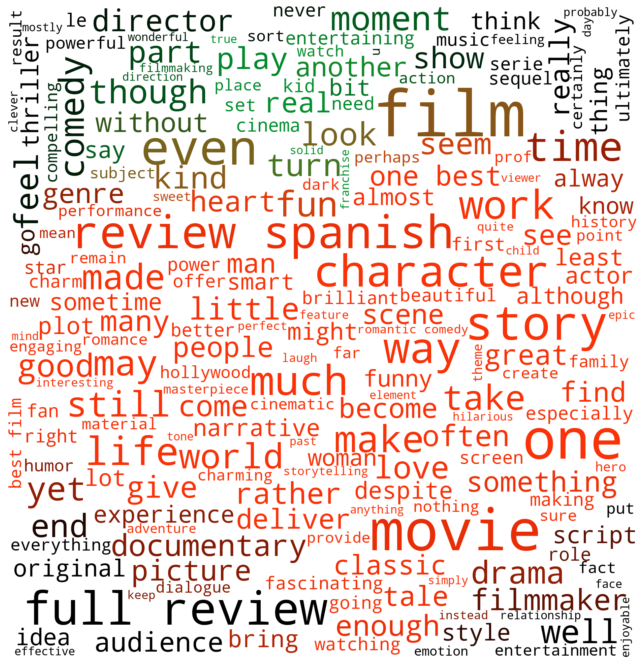

In [5]:
# Generate a word cloud image
mask = np.array(Image.open('../output/img/red_tomato_mask_colored.png'))
#wordcloud_tomato = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(str(review) for review in reviews[reviews['Type']==1]['Text']))
wordcloud_tomato = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=200, mask=mask).generate(' '.join(str(review) for review in reviews[reviews['Type']==1]['Text']))

# Create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_tomato.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("../output/img/fresh_tomato_wordcloud.png", format="png")

plt.show()

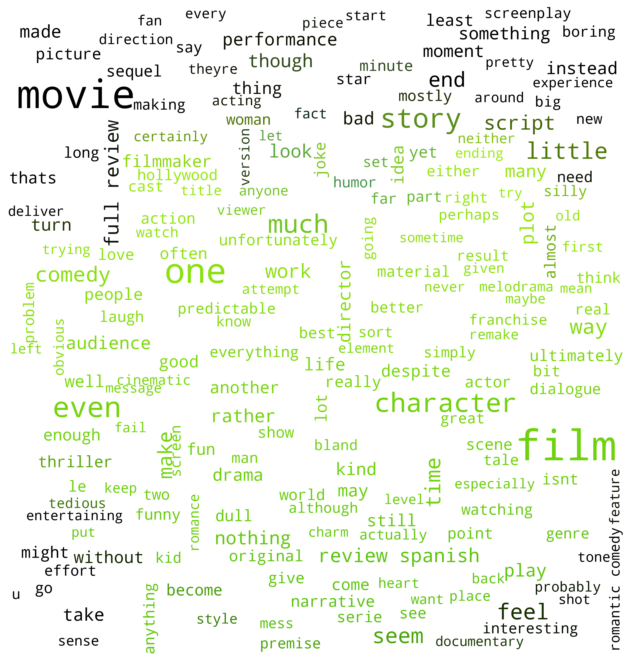

In [63]:
# Generate a word cloud image
mask = np.array(Image.open('../output/img/green_tomato_mask_colored.png'))
#wordcloud_tomato = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(str(review) for review in reviews[reviews['Type']==1]['Text']))
wordcloud_tomato = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=200, mask=mask).generate(' '.join(str(review) for review in reviews[reviews['Type']==0]['Text']))

# Create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_tomato.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("../output/img/rotten_tomato_wordcloud.png", format="png")

plt.show()

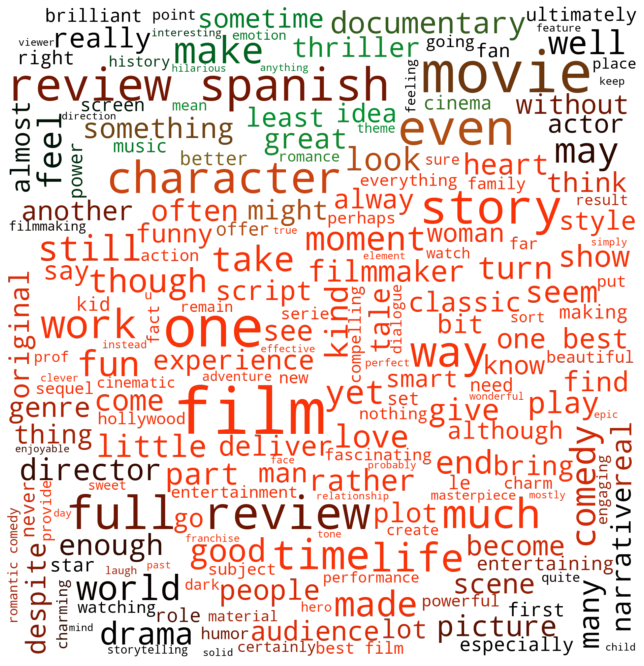

In [27]:
# Generate a word cloud image
mask = np.array(Image.open('../output/img/red_tomato_mask_colored.png'))
#wordcloud_tomato = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(str(review) for review in reviews[reviews['Type']==1]['Text']))
wordcloud_tomato = WordCloud(stopwords=STOPWORDS, background_color=None, mode='RGBA', max_words=200, mask=mask).generate(' '.join(str(review) for review in reviews[reviews['Type']==1]['Text']))

# Create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud_tomato.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("../output/img/fresh_tomato_wordcloud.png", format="png")

plt.show()

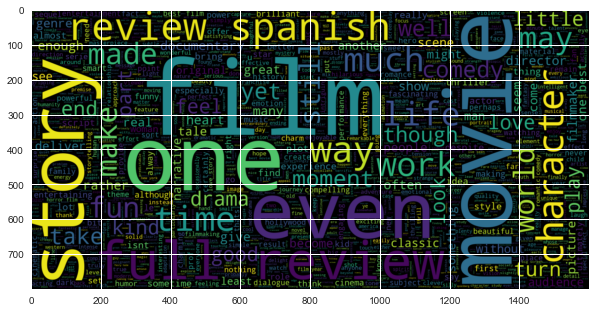

In [34]:
plt.figure(figsize=(10,20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(str(review) for review in reviews[reviews['Type']==1]['Text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
reviews[reviews['Type']==1]['Text'][69053]

'sickly sentimental barnstorming fight scene leave counting star'

In [30]:
reviews[reviews['Type']==1]['Text'].values

array(['fantasy adventure fuse greek mythology contemporary american place value anyone around 15 give take couple year thrill visual spectacle',
       'uma thurman medusa gorgon coiffure writhing snake stoneinducing hypnotic gaze one highlight bewitching fantasy',
       'topnotch cast dazzling special effect tide teen next harry potter instalment',
       ..., 'rousing reconstruction 1879 battle rorkes drift',
       'seen today startling indictment british imperialism seems remarkably forwardthinking work',
       'rousing visual spectacle thats prequel cy endfield directed zulu 1964'],
      dtype=object)

In [29]:
" ".join(reviews[reviews['Type']==1]['Text'])

TypeError: sequence item 69053: expected str instance, float found